import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Basic process of understanding the dataset

In [ ]:
dataset = pd.read_csv('/content/House_Rent_Dataset.csv')

In [ ]:
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
dataset.shape

(4746, 12)

In [ ]:
#see if the data contain missing values or not
dataset.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [ ]:
dataset.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Data Cleaning

In [ ]:
dataset = dataset.drop(['Point of Contact','Floor'],axis=1)

In [ ]:
dataset['Posted On'] = pd.to_datetime(dataset['Posted On'])

In [ ]:
dataset.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


In [ ]:
backup = dataset.copy()

Encoding for City name

In [ ]:
dataset['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [ ]:
le = LabelEncoder()

In [ ]:
dataset['City']= le.fit_transform(dataset['City'])

In [ ]:
dataset.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2022-05-18,2,10000,1100,Super Area,Bandel,4,Unfurnished,Bachelors/Family,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",4,Semi-Furnished,Bachelors/Family,1
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,4,Semi-Furnished,Bachelors/Family,1
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,4,Unfurnished,Bachelors/Family,1
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,4,Unfurnished,Bachelors,1


In [ ]:
# what is encoded to what
city_encoded = list(le.classes_)
for i in range(len(city_encoded)):
  print(str(i) + " = " +city_encoded[i])

0 = Bangalore
1 = Chennai
2 = Delhi
3 = Hyderabad
4 = Kolkata
5 = Mumbai


encode furninshing status and area type


In [ ]:
dataset['Area Type'].unique()

array([2, 1, 0])

In [ ]:
dataset['Area Type'] = le.fit_transform(dataset['Area Type'])

In [ ]:
areatype = list(le.classes_)
for i in range(0,len(areatype)):
  print(str(i) + " = " +areatype[i])

0 = Built Area
1 = Carpet Area
2 = Super Area


In [ ]:
dataset['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [ ]:
dataset['Furnishing Status'] = le.fit_transform(dataset['Furnishing Status'])

In [ ]:
status = list(le.classes_)
for i in range(0,len(status)):
  print(str(i) + " = " +status[i])

0 = Furnished
1 = Semi-Furnished
2 = Unfurnished


In [ ]:
dataset.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2022-05-18,2,10000,1100,2,Bandel,4,2,Bachelors/Family,2
1,2022-05-13,2,20000,800,2,"Phool Bagan, Kankurgachi",4,1,Bachelors/Family,1
2,2022-05-16,2,17000,1000,2,Salt Lake City Sector 2,4,1,Bachelors/Family,1
3,2022-07-04,2,10000,800,2,Dumdum Park,4,2,Bachelors/Family,1
4,2022-05-09,2,7500,850,1,South Dum Dum,4,2,Bachelors,1


In [ ]:
dataset['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [ ]:
dataset['Tenant Preferred'] = le.fit_transform(dataset['Tenant Preferred'])
tenant = list(le.classes_)
for i in range(len(tenant)):
  print(str(i) + " = " +tenant[i])

0 = Bachelors
1 = Bachelors/Family
2 = Family


In [ ]:
dataset.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2022-05-18,2,10000,1100,2,Bandel,4,2,1,2
1,2022-05-13,2,20000,800,2,"Phool Bagan, Kankurgachi",4,1,1,1
2,2022-05-16,2,17000,1000,2,Salt Lake City Sector 2,4,1,1,1
3,2022-07-04,2,10000,800,2,Dumdum Park,4,2,1,1
4,2022-05-09,2,7500,850,1,South Dum Dum,4,2,0,1


Feature Selection

In [ ]:
X = dataset.drop(columns='Rent')
Y = dataset['Rent']

In [ ]:
print(X.head())

   Posted On  BHK  Size  Area Type             Area Locality  City  \
0 2022-05-18    2  1100          2                    Bandel     4   
1 2022-05-13    2   800          2  Phool Bagan, Kankurgachi     4   
2 2022-05-16    2  1000          2   Salt Lake City Sector 2     4   
3 2022-07-04    2   800          2               Dumdum Park     4   
4 2022-05-09    2   850          1             South Dum Dum     4   

   Furnishing Status  Tenant Preferred  Bathroom  
0                  2                 1         2  
1                  1                 1         1  
2                  1                 1         1  
3                  2                 1         1  
4                  2                 0         1  


In [ ]:
print(Y.head())

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64


Visualization

In [ ]:
X.shape

(4746, 9)

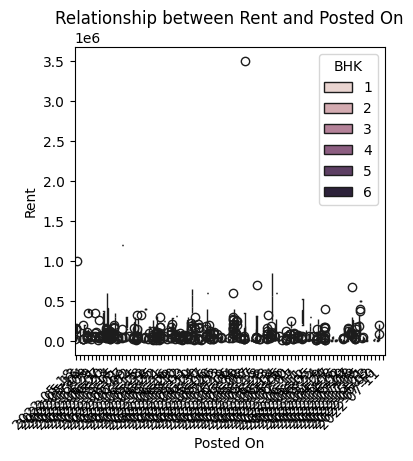

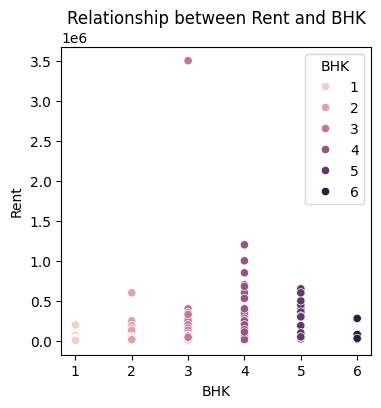

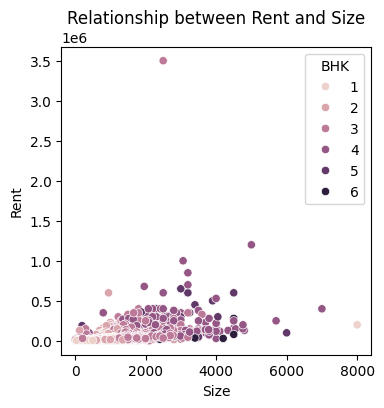

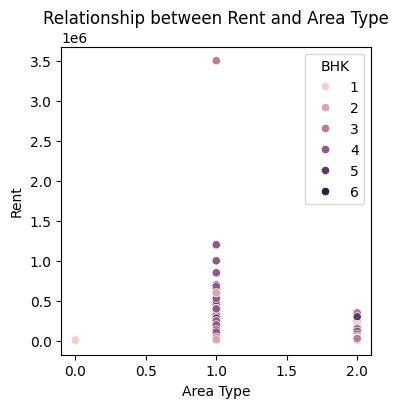

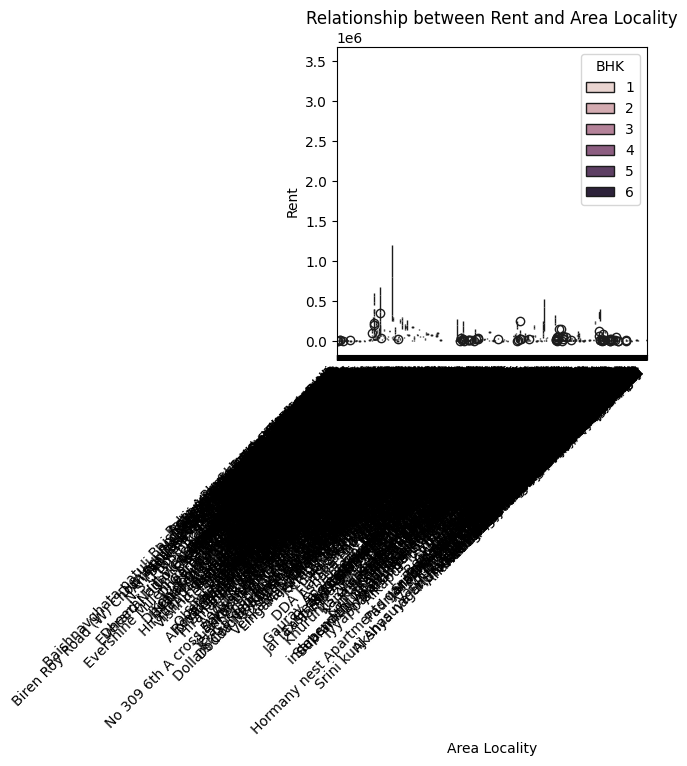

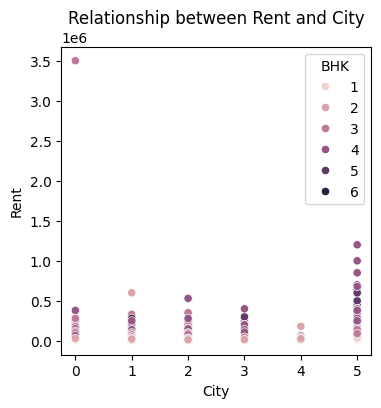

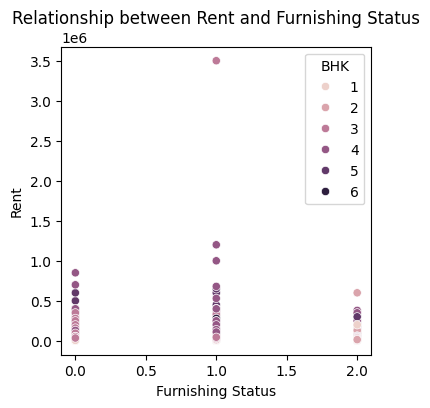

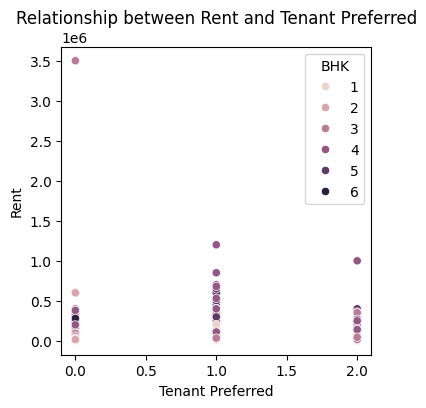

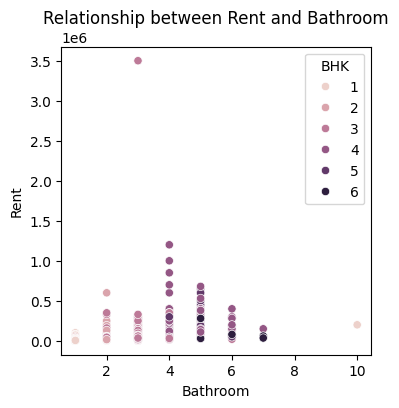

In [ ]:
for column in X.columns:
    if pd.api.types.is_numeric_dtype(X[column]):  # Check if the column is numeric
        plt.figure(figsize=(4, 4))
        sns.scatterplot(x=X[column], y=Y, hue=X['BHK'])  # Add hue for BHK
        plt.title(f"Relationship between Rent and {column}")
        plt.xlabel(column)
        plt.ylabel("Rent")
        plt.show()
    else:  # Handle categorical features
        plt.figure(figsize=(4, 4))
        sns.boxplot(x=X[column], y=Y, hue=X['BHK'])  # Add hue for BHK
        plt.title(f"Relationship between Rent and {column}")
        plt.xlabel(column)
        plt.ylabel("Rent")
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [ ]:
v =list(X.iloc[0:1,:])
print(v)

['Posted On', 'BHK', 'Size', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom']


In [ ]:
v.remove('Posted On')
v.remove('Area Locality')

In [ ]:
v

['BHK',
 'Size',
 'Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom']

<ipython-input-108-23cfb0ad93b6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=12)
<ipython-input-108-23cfb0ad93b6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=12)
<ipython-input-108-23cfb0ad93b6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=12)
<ipython-input-108-23cfb0ad93b6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=12)


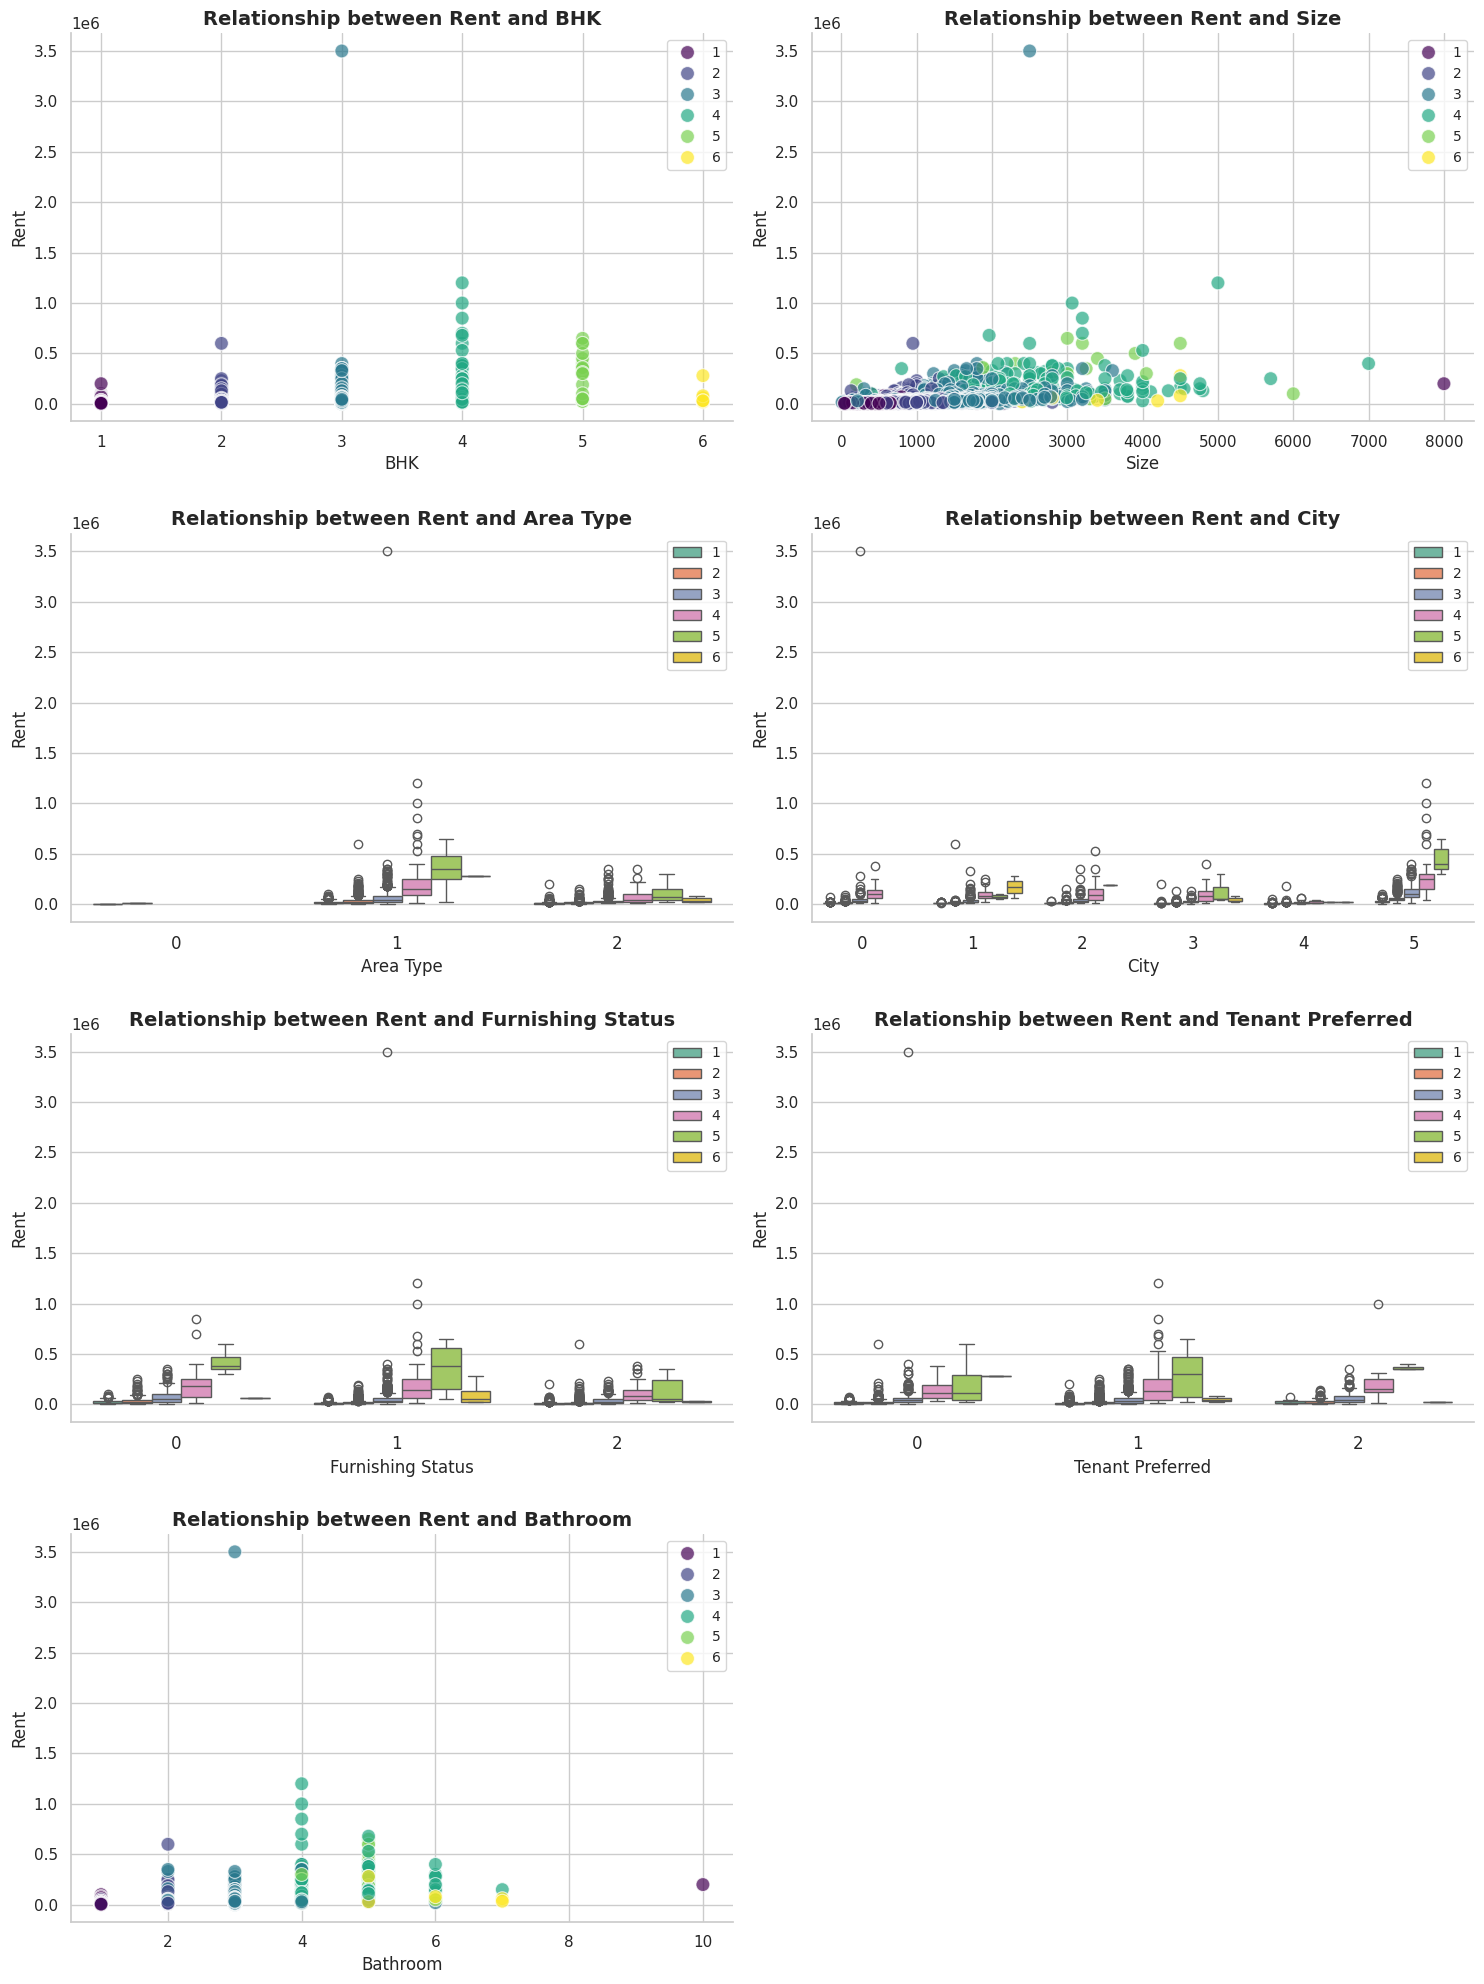

In [ ]:
num_features = len(v)

sns.set_theme(style="whitegrid")

# Calculate number of rows and columns for subplots
num_cols = 2  # Number of columns
num_rows = (num_features + num_cols - 1) // num_cols  # Number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, column in enumerate(v):
    ax = axes[i]  # Get the current subplot axis

    if column in ['BHK', 'Size', 'Bathroom']:
        sns.scatterplot(x=X[column], y=Y, hue=X['BHK'], palette="viridis", s=100, alpha=0.7, ax=ax)

    else:
        sns.boxplot(x=X[column], y=Y, hue=X['BHK'], palette="Set2", ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=12)

    ax.set_title(f"Relationship between Rent and {column}", fontsize=14, fontweight='bold')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Rent", fontsize=12)
    ax.legend(fontsize=10)
    sns.despine(ax=ax)

# Remove any unused subplots
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Train the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# we need to standardize the size
scaler = StandardScaler()
X_train[['Size']] = scaler.fit_transform(X_train[['Size']])
X_test[['Size']] = scaler.transform(X_test[['Size']])

In [ ]:
X_train.head()

,Posted On,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
1995,2022-05-10,2,-0.026920,2,Bilekahalli,0,1,1,2
1497,2022-06-23,2,-0.263117,2,Nagappa Reddy layout-Dooravani Nagar,0,1,1,2
2763,2022-06-13,1,-0.664654,2,Dwarka,2,0,1,1
1351,2022-07-07,1,-0.790626,2,in Borivali East,5,1,0,1
1862,2022-07-04,2,-0.105652,2,Bhuvaneswari Nagar,0,0,1,2


Model train


In [ ]:
# drop 'Posted On' and 'Area Locality' column, as Area locality is text based and there are too many different values in it
X_train = X_train.drop(['Posted On', 'Area Locality'], axis=1)
X_test = X_test.drop(['Posted On', 'Area Locality'], axis=1)
#Now, fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: -106404.5509830958


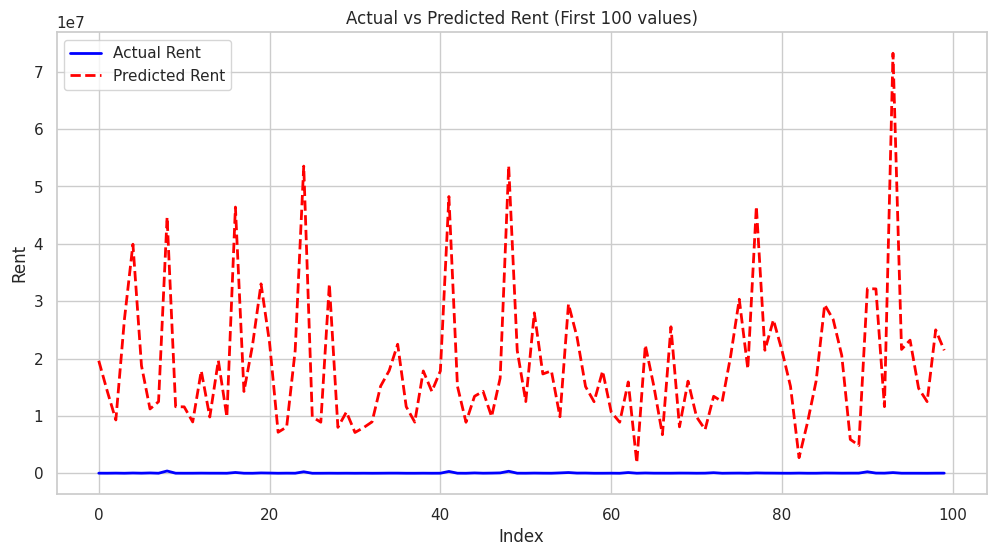

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Rent', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted Rent', color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Rent (First 100 values)")
plt.xlabel("Index")
plt.ylabel("Rent")
plt.legend()
plt.grid(True)
plt.show()


Approch 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

# ... (your data loading and preprocessing code) ...

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters

# Drop 'Posted On' and 'Area Locality' from X before cross-validation
X = X.drop(['Posted On', 'Area Locality'], axis=1)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_squared_error')

# Print the average RMSE
print("Average RMSE:", np.sqrt(-scores.mean()))

Average RMSE: 63933.747754605254


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 46623.86908651728
R-squared: 0.4545603053766115


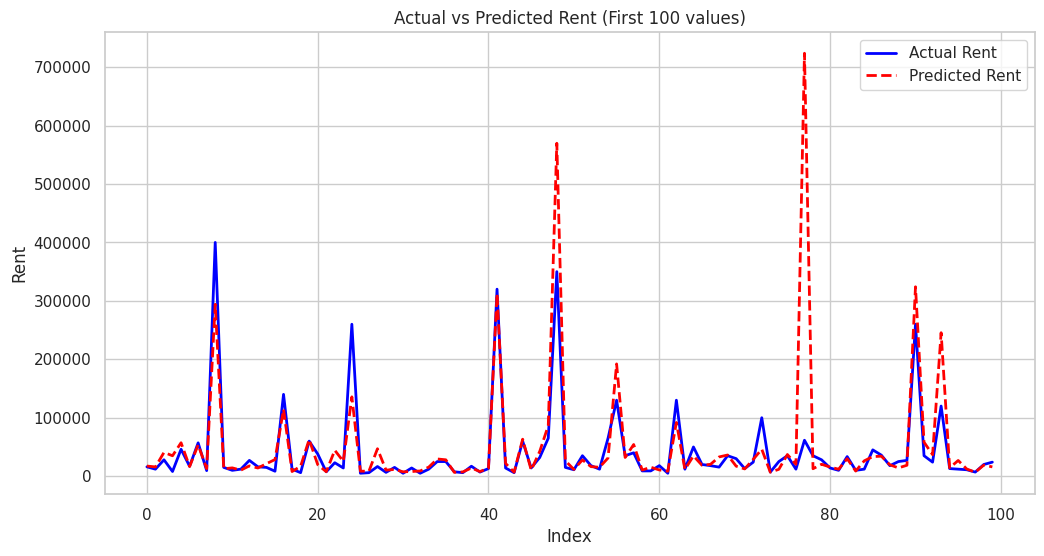

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Rent', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted Rent', color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Rent (First 100 values)")
plt.xlabel("Index")
plt.ylabel("Rent")
plt.legend()
plt.grid(True)
plt.show()

Approch 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
dataset = pd.read_csv('House_Rent_Dataset.csv')  # Replace 'House_Rent_Dataset.csv' with your actual file path

# Data Cleaning and Preprocessing
dataset = dataset.drop(['Point of Contact', 'Floor', 'Posted On', 'Area Locality'], axis=1)
categorical_features = ['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred']
for feature in categorical_features:
    le = LabelEncoder()
    dataset[feature] = le.fit_transform(dataset[feature])

# Feature Scaling
scaler = StandardScaler()
dataset[['Size']] = scaler.fit_transform(dataset[['Size']])

# Split data into features (X) and target (Y)
X = dataset.drop(columns='Rent')
Y = dataset['Rent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Random Forest model with hyperparameter tuning
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Optional: Feature Importance Analysis
feature_importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)

Root Mean Squared Error: 39776.204726075455
R-squared: 0.6030125259048296
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}

Feature Importance:
             Feature  Importance
1               Size    0.373895
6           Bathroom    0.315885
3               City    0.207923
5   Tenant Preferred    0.074429
4  Furnishing Status    0.011291
0                BHK    0.010636
2          Area Type    0.005940


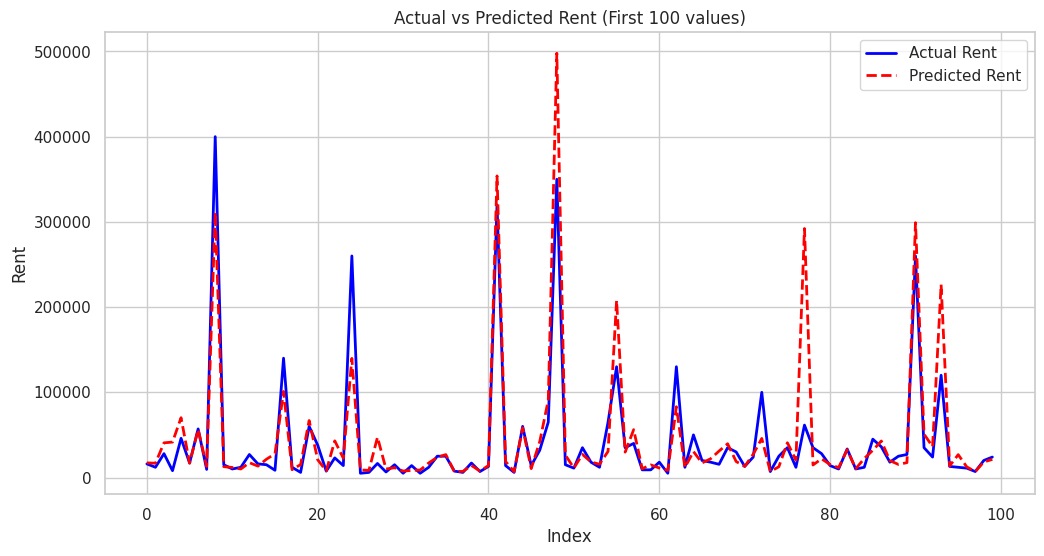

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Rent', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted Rent', color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Rent (First 100 values)")
plt.xlabel("Index")
plt.ylabel("Rent")
plt.legend()
plt.grid(True)
plt.show()

Approch 4

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from category_encoders import TargetEncoder

# Load the dataset
dataset = pd.read_csv('House_Rent_Dataset.csv')  # Replace 'House_Rent_Dataset.csv' with your actual file path

# Data Cleaning and Preprocessing
dataset = dataset.drop(['Point of Contact', 'Floor', 'Posted On'], axis=1)  # Keep 'Area Locality' for now

# Target Encoding for Categorical Features
categorical_features = ['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Area Locality']
for feature in categorical_features:
    encoder = TargetEncoder(verbose=0, handle_unknown='value', handle_missing='value')
    dataset[feature] = encoder.fit_transform(dataset[feature], dataset['Rent'])

# Feature Scaling
scaler = StandardScaler()
dataset[['Size']] = scaler.fit_transform(dataset[['Size']])

# Advanced Feature Engineering (Interaction Feature)
dataset['Size_BHK_Interaction'] = dataset['Size'] * dataset['BHK']

# Split data into features (X) and target (Y)
X = dataset.drop(columns='Rent')
Y = dataset['Rent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Selection and Hyperparameter Tuning
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

best_model = None
best_score = -np.inf

for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    score = grid_search.best_score_
    if score > best_score:
        best_score = score
        best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Model:", type(best_model).__name__)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Best Hyperparameters:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Model: RandomForestRegressor
Root Mean Squared Error: 28050.531074162245
R-squared: 0.8025703863888644
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}


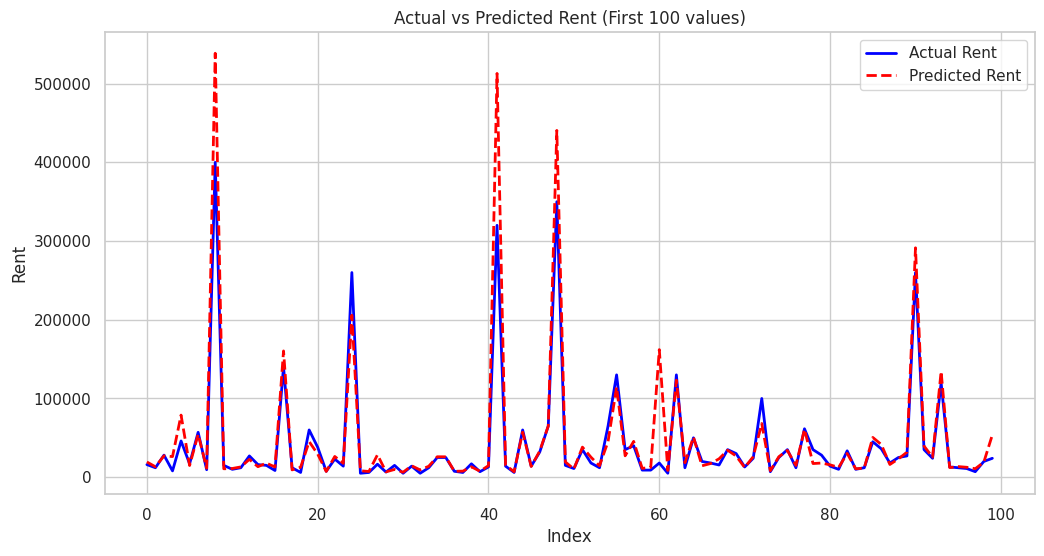

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Rent', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted Rent', color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Rent (First 100 values)")
plt.xlabel("Index")
plt.ylabel("Rent")
plt.legend()
plt.grid(True)
plt.show()

Approch 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from category_encoders import TargetEncoder

# Load the dataset
dataset = pd.read_csv('House_Rent_Dataset.csv')  # Replace 'House_Rent_Dataset.csv' with your actual file path

# Data Cleaning and Preprocessing
dataset = dataset.drop(['Point of Contact', 'Floor', 'Posted On'], axis=1)

# Target Encoding for Categorical Features
categorical_features = ['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Area Locality']
for feature in categorical_features:
    encoder = TargetEncoder(verbose=0, handle_unknown='value', handle_missing='value')
    dataset[feature] = encoder.fit_transform(dataset[feature], dataset['Rent'])

# Feature Scaling
scaler = StandardScaler()
dataset[['Size']] = scaler.fit_transform(dataset[['Size']])

# Advanced Feature Engineering (Interaction Feature)
dataset['Size_BHK_Interaction'] = dataset['Size'] * dataset['BHK']

# Split data into features (X) and target (Y)
X = dataset.drop(columns='Rent')
Y = dataset['Rent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define base models for stacking
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Define meta-model for stacking
meta_model = LinearRegression()  # Or any other suitable regressor

# Create stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=KFold(n_splits=5, shuffle=True, random_state=42)
)

# Define hyperparameter grid for stacking regressor (including base models)
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.01, 0.1]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=stacking_regressor,
    param_grid=param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Model:", type(best_model).__name__)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Best Hyperparameters:", grid_search.best_params_)

Best Model: StackingRegressor
Root Mean Squared Error: 32560.269328857798
R-squared: 0.733985018146336
Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__n_estimators': 100}


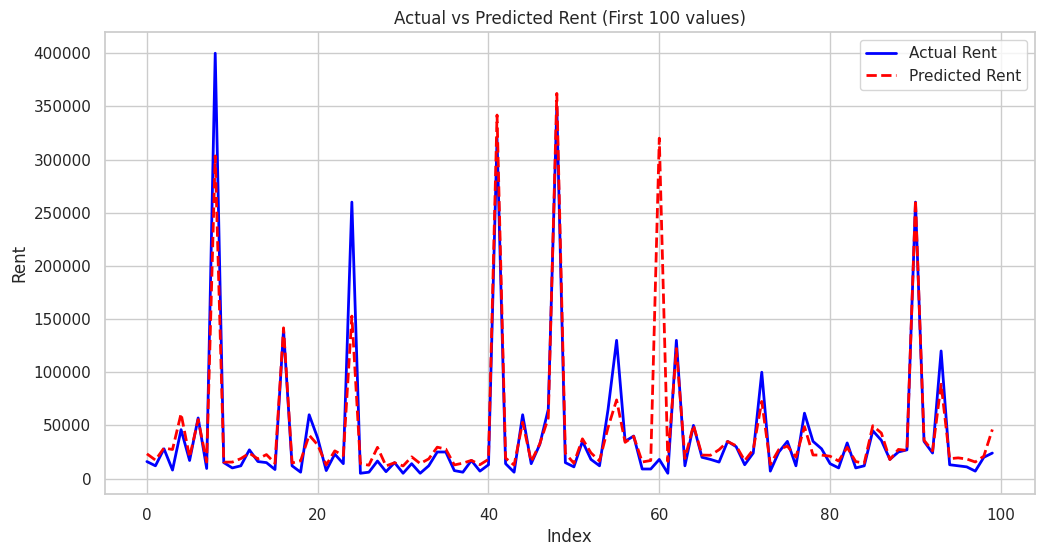

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Rent', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted Rent', color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Rent (First 100 values)")
plt.xlabel("Index")
plt.ylabel("Rent")
plt.legend()
plt.grid(True)
plt.show()